# Case Study - Wine Quality Prediction

# Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

## Number of Instances: red wine - 1599; white wine - 4898. 

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


In [195]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from confusionMatrix import plotConfusionMatrix # user defined

In [196]:
import os
os.chdir(r'D:\PERSONAL DATA\GREAT LEARNING\Course Online\Module 4 - Ensemble techniques\Week-1')

In [199]:
#Loading dataset
wine = pd.read_csv(r'winequality-red.csv',sep=';')

In [200]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [201]:
wine.shape

(1599, 12)

In [202]:
wine['quality'].unique() # 6 diff

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [204]:
wine['quality'].value_counts(normalize = True)#/wine.shape[0]*100 

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [207]:
wine['quality'].value_counts()#.plot(kind = 'bar')

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Let's do some plotting to know how the data columns are distributed in the dataset**

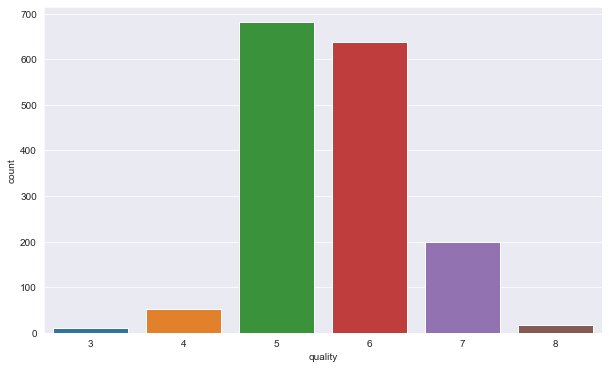

In [208]:
#target variable.
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'quality', data = wine)

In [209]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

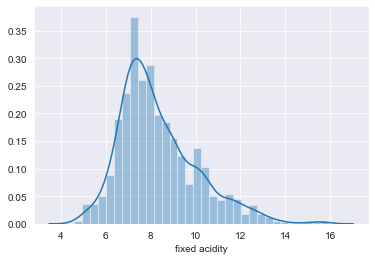

In [210]:
# EDA on the independent variables
sns.distplot(wine['fixed acidity'])

In [14]:
# FA - cont, Q - cat ---- based on quality, is my mean value of FA changing?

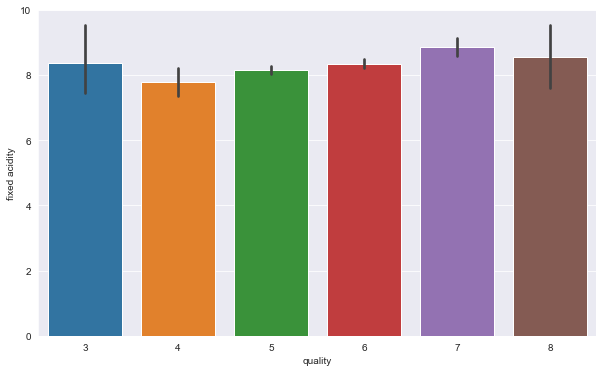

In [211]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine) # x axis should contain the cat variable (quality), y - cont (FA)

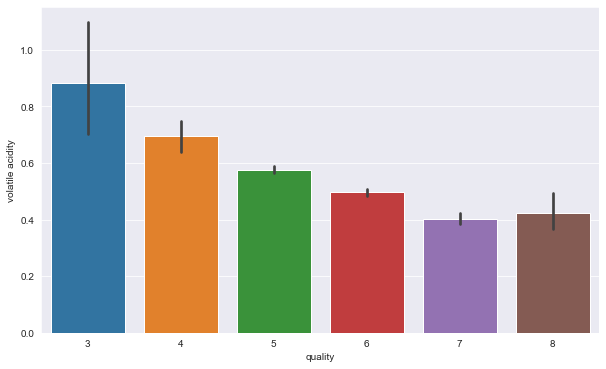

In [212]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

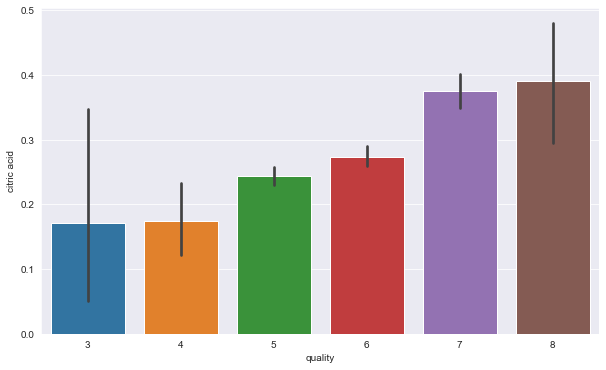

In [213]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

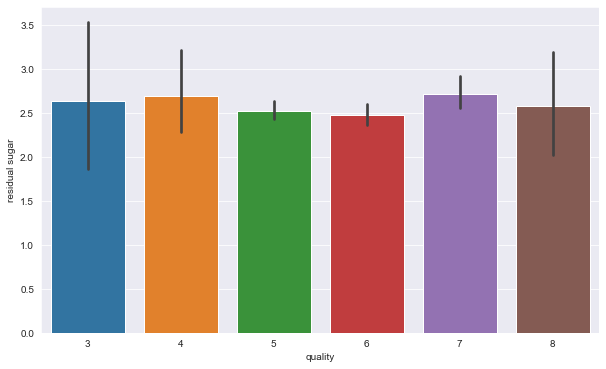

In [214]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

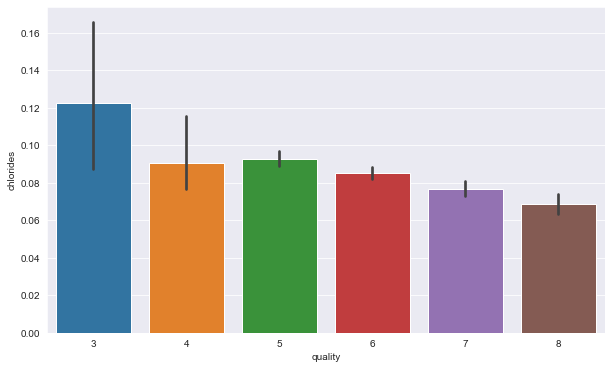

In [215]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

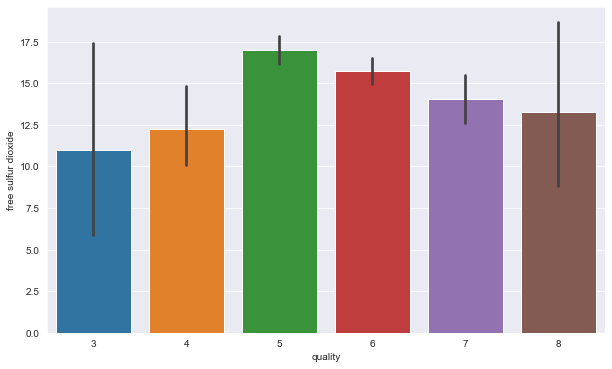

In [216]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

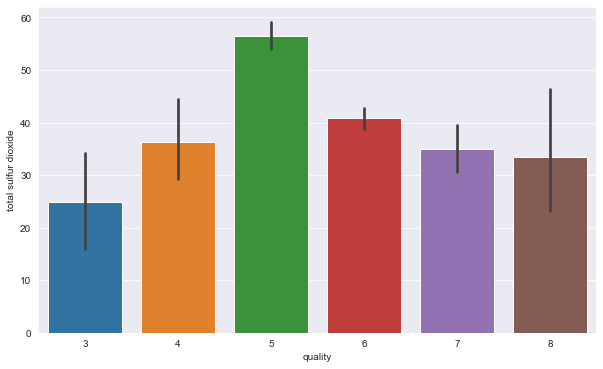

In [217]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

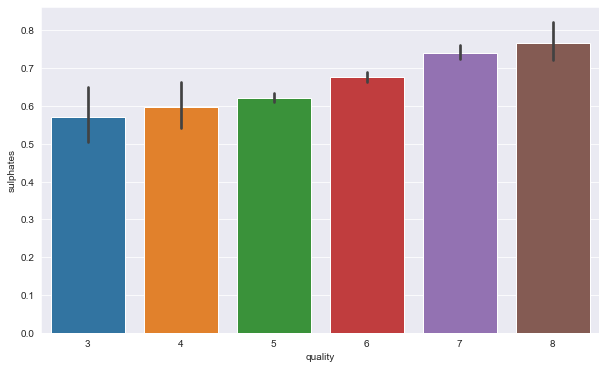

In [218]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

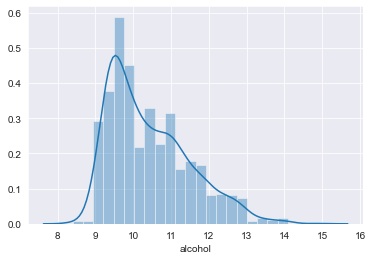

In [220]:
sns.distplot(wine['alcohol'])

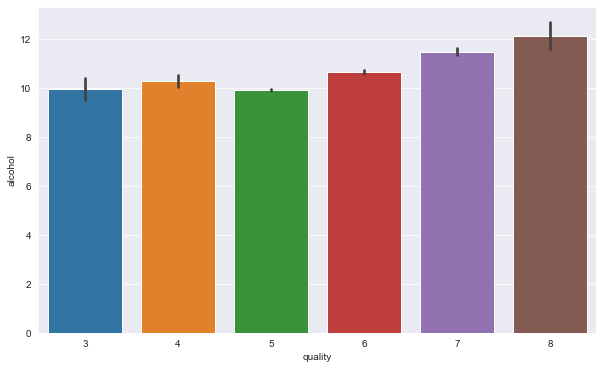

In [221]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [222]:
# all of the features are important 

In [223]:
# will outliers have an effect on decision tree? pruning -- we cut out branches wrt columns
# recursive binary splitting - 

## Preprocessing Data for performing Machine learning algorithms

In [31]:
wine['quality'].value_counts() 
# when the proporitional count of a class is very low wrt to the majority class, the machine's
# capacity to learn is low.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
# 3 classes -- 3-5,6,7-8

In [33]:
#convert this problem toa simpler one? -- making it dichotomous - quality 0, 1 (bad, good)

In [34]:
# make a binary classification for y  - to play safe (0,1) - bad, good -- 6.5, 7> --- good wine

In [35]:
# pd.cut creates equal intervals of data based on equal grouping
# pd.qcut creates unequal intervals of data bases om quanitles 

In [224]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8) # based on practical knowledge
group_names = ['bad', 'good']  
wine['quality'] =  pd.cut(wine['quality'], bins = bins, labels = group_names) # pd.cut(x, bins = (2, 6.5, 8), labels)

In [225]:
# bad - <6.5
# good >6.5 - 7,8

In [226]:
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [227]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad


In [40]:
#wine['quality'].map({'bad': 0, 'good': 1})
# OR

In [228]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [229]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [231]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [232]:
wine['quality'].value_counts()/wine.shape[0] # (normalize = True)

0    0.86429
1    0.13571
Name: quality, dtype: float64

In [233]:
# data is highly imbalanced 

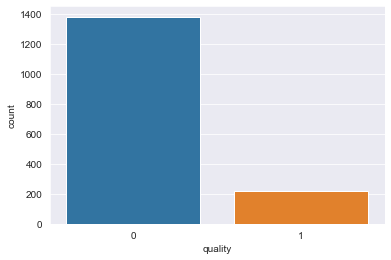

In [235]:
sns.countplot(wine['quality'])

In [236]:
#Now seperate the dataset into X and y
X = wine.drop('quality', axis = 1) # dataframe
y = wine['quality'] # series

In [238]:
# no SMOTE - will not handle imbalance

In [239]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [240]:
dtree_model = DecisionTreeClassifier() # without any tweaking # no pruning (max_depht = None)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [241]:
dtree_model.score(X_train, y_train) # overfitting - DT, imbalanced

1.0

In [242]:
dtree_model.score(X_test, y_test)

0.86875

In [243]:
predictions_ = dtree_model.predict(X_test) 

In [244]:
dtree_model.predict_proba(X_test[:5])# 50%

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [245]:
f1= f1_score(y_test,predictions_, average='micro')

In [246]:
confusion_matrix(y_test,predictions_)

array([[373,  40],
       [ 23,  44]], dtype=int64)

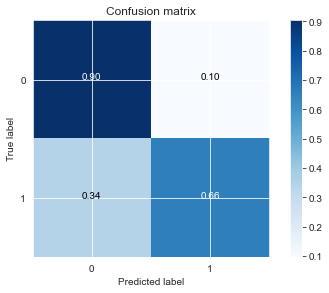

In [247]:
#plt.figure(figsize=(5,3))
cnf_mat = confusion_matrix(y_test,predictions_)
plotConfusionMatrix(cnf_mat, 2) #, title='F1_micro {:.3f}'.format(f1))

In [248]:
# if the goal is to predict just 0 (whose f1 is actually good), still you won't take a rish saying it is a good model, why?
# tomorrow the minor class might end up affecting your major class - 0 might be falsely predicted as 1/vice versa
# overfitting

In [249]:
print(classification_report(y_test, predictions_))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.52      0.66      0.58        67

    accuracy                           0.87       480
   macro avg       0.73      0.78      0.75       480
weighted avg       0.88      0.87      0.87       480



In [250]:
RF_model = RandomForestClassifier() # without any tweaking # no pruning 
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [251]:
RF_model.score(X_train, y_train) # overfitting - DT, imbalanced --- acc = TP + TN / all 

1.0

In [252]:
RF_model.score(X_test, y_test)  #1, 0,897 # 0.9, 0.925 - reduced overfitting

0.8833333333333333

In [253]:
predictions_RF = RF_model.predict(X_test) 

In [254]:
print(classification_report(y_test, predictions_RF))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       413
           1       0.60      0.48      0.53        67

    accuracy                           0.88       480
   macro avg       0.76      0.71      0.73       480
weighted avg       0.87      0.88      0.88       480



In [255]:
# model is weak because of data imbalance

In [ ]:
# majority class, minority class --

In [ ]:
# lower, increasing by synthetic values by KNN simulation

##### SMOTE with --

**1. Grid Search CV**

**2. Cross Validation Score**

In [256]:
# also explore the class weight attribute of DT

In [258]:
from imblearn.over_sampling import SMOTE 

In [259]:
sm = SMOTE(random_state = 2) # SMOTE works on the principle of KNN
X_sm, y_sm = sm.fit_sample(X, y) 

In [260]:
# attacks only the minotiy class - reduces the relative percentage of false values wrt to true values-- F1 score increases for
# the minority class

In [261]:
#X_sm # SMOTE creates addtional instances of 1 for the dependent variable and also the corresponding independent variables

In [265]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [266]:
y_sm.value_counts()

1    1382
0    1382
Name: quality, dtype: int64

In [267]:
X_sm.shape, X.shape

((2764, 11), (1599, 11))

In [268]:
sum(y == 0), sum(y_sm==0)  #majority class

(1382, 1382)

In [269]:
sum(y == 1), sum(y_sm==1) # minority class

(217, 1382)

In [272]:
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

In [273]:
# Roc_auc_score, score : for roc_auc_score you need probabilities. predict_proba
# F1 score - HM(P,R) especially for imbalanced data set

In [274]:
# model improvement - 
#1. SMOTE - for imbalanced
#2. preprocessing - but not much chances here
#3. model tweaking using grid search !! - especially very effective in tree models
#4. cross validation - instead of simply using one-time train test split(validation set approach), do multiple split/folds
# Here we will combine 3 and 4 using GridSearchCV from python

In [275]:
# grid search algorithm
# model = DT()
# Hypyer Paramters - max_depth, criterion
# np.arange(15, 30)*len(['gini','entropy'])= 30 models

In [276]:
import numpy as np

In [277]:
# GSCV after SMOTE

In [278]:
import numpy as np

In [280]:
def dtree_grid_search(X,y,nfolds): # nfolds = 5,4 -- 30*4 = 120 models
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(15, 30)} # pruning -- param_grid should be in the form of dictionary 
    # decision tree model
    dtree_model = DecisionTreeClassifier()
    #use gridsearch to val all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds) # 2 - modelName, paramters, cv
    #fit model to data
    dtree_gscv.fit(X, y) # X,y - train because you always fit on the train 
    #find score
    score = dtree_gscv.score(X, y) # score
    best_params = dtree_gscv.best_params_
    
    return best_params, score, dtree_gscv 

In [281]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score
from confusionMatrix import plotConfusionMatrix

In [282]:
best_param, acc_DT_gs, dt_gs = dtree_grid_search(X_train_res,y_train_res, 4) # after SMOTE
acc_val_DT_gs = dt_gs.score(X_val_res, y_val_res)

In [283]:
print(best_param) # try max depth with 25 to 35

{'criterion': 'entropy', 'max_depth': 24}


In [284]:
print(acc_DT_gs, acc_val_DT_gs) 

1.0 0.9036144578313253


In [285]:
# How to improve your model 
# 1. tweak max_depth more -- but here 25 
# 2. tweak other parameters 'min_samples_split'
# 3. preprocessing !!!! - discretize the continuous features

In [286]:
y_pred_proba = dt_gs.predict_proba(X_val_res)

In [287]:
y_pred_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [289]:
predictions_ = dt_gs.predict(X_val_res) 
f1_DT_gs = f1_score(y_val_res,predictions_, average='micro')

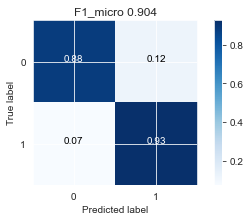

In [290]:
plt.figure(figsize=(5,3))
cnf_mat = confusion_matrix(y_val_res,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1_DT_gs))

In [291]:
print(classification_report(y_val_res, predictions_))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       426
           1       0.88      0.93      0.90       404

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830



In [117]:
# ------------------- Ensemble -----------------------------------------------------------------------------------

In [292]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50) # no. of trees = 50 # just to compare with DT
rfcl.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=50)

In [293]:
acc_RF = rfcl.score(X_train_res,y_train_res)
acc_val_RF = rfcl.score(X_val_res,y_val_res)
predictions_RF = rfcl.predict(X_val_res) 
f1_RF= f1_score(y_val_res,predictions_RF, average='micro')

In [294]:
print(classification_report(y_val_res, predictions_RF)) # so from (94,59), now it (93, 93) after SMOTE

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       426
           1       0.90      0.98      0.93       404

    accuracy                           0.93       830
   macro avg       0.94      0.93      0.93       830
weighted avg       0.94      0.93      0.93       830



In [295]:
import numpy as np

In [296]:
def RF_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param = {'criterion':['gini','entropy'],'max_depth': np.arange(11, 19), # if the outcome is 18, re use (16, 22)
                  'n_estimators': [50, 100, 200, 300]} # min_samples_split=2,
    #randomForest model without gridSrearch
    rf = RandomForestClassifier() # without specifying any parameter
    #use gridsearch to val all values
    rf_gscv = GridSearchCV(estimator = rf, param_grid = param, cv=nfolds)
    #fit model to data
    rf_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = rf_gscv.score(X, y) # with grid search
    
    return rf_gscv.best_params_, rf_gscv, score_gscv  

In [297]:
best_params, rf_gscv, score_gscv = RF_grid_search(X_train_res,y_train_res,4)
print(best_params)
acc_RF_gs = score_gscv
acc_val_RF_gs = rf_gscv.score(X_val_res,y_val_res)
predictions_RF_gs = rf_gscv.predict(X_val_res) 
f1_RF_gs = f1_score(y_val_res,predictions_RF_gs, average='micro')

{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 300}


In [281]:
# 64 models. 16 models have 50 trees, another 16 have 100 trees and so on....

In [284]:
# logic is exactly same, only variable names are diff

In [298]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl.fit(X_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=50, oob_score=True,
                  random_state=22)

In [299]:
acc_BG = bgcl.score(X_train_res,y_train_res)
acc_val_BG = bgcl.score(X_val_res,y_val_res)
predictions_BG = bgcl.predict(X_val_res) 
f1_BG = f1_score(y_val_res,predictions_BG, average='micro')

In [300]:
# HW.....
def Bag_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param = {'criterion':['gini','entropy'],'max_samples': [0.6, 0.7, 0.8], 
                  'n_estimators': [50, 100, 200, 300]} # min_samples_split=2,
    #randomForest model without gridSrearch
    bg = BaggingClassifier(bootstrap=True, oob_score=True, random_state=22) # without specifying any parameter
    #use gridsearch to val all values
    bg_gscv = GridSearchCV(estimator = bg, param_grid = param, cv=nfolds)
    #fit model to data
    bg_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = bg_gscv.score(X, y) # with grid search
    
    return bg_gscv.best_params_, bg_gscv, score_gscv  

In [301]:
#bg_gs_best, bg_gscv, score_gscv = Bag_grid_search(X_train_res,y_train_res,4)

In [302]:
#acc_BG_gs = bg_gscv.score(X_train_res,y_train_res)
#acc_val_BG_gs = bg_gscv.score(X_val_res,y_val_res)
#predictions_BG_gs = bg_gscv.predict(X_val_res) 
#f1_BG_gs = f1_score(y_val_res,predictions_BG_gs, average='micro')

In [303]:
# Bo0sting ----

In [304]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22) #n_estimators= 100, learning_rate=0.1
abcl.fit(X_train_res, y_train_res)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=22)

In [305]:
acc_AB = abcl.score(X_train_res,y_train_res)
acc_val_AB = abcl.score(X_val_res,y_val_res)
predictions_AB = abcl.predict(X_val_res) 
f1_AB= f1_score(y_val_res,predictions_AB, average='micro')

In [306]:
# hw you can do grid search

In [307]:
from xgboost import XGBClassifier # most important 

In [308]:
xgboost = XGBClassifier(learning_rate =0.05, n_estimators=300, max_depth=5) # learning_rate=0.1, n_estimators=100, min_samples_split=2,max_depth=3,
xgboost.fit(X_train_res, y_train_res)

[19:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [309]:
acc_XGB = xgboost.score(X_train_res,y_train_res)
acc_val_XGB = xgboost.score(X_val_res,y_val_res)
predictions_XGB = xgboost.predict(X_val_res) 
f1_XGB = f1_score(y_val_res,predictions_XGB, average='micro')

In [113]:
# hw you can do grid search on XGBoost

In [310]:
#-----------model evaluation !!

In [311]:
# book keeping - train acc, val acc, f1 score, gs versions of these 3 - #6 for each algo

In [313]:
d = {'Model': ['DT_gs', 'RF', 'RF_gs', 'AdaBoost', 'Bagging', 'XGBoost'], #adaBoost_gs, Bagging_gs, XGBoost_gs
     'Train_Acc':[acc_DT_gs, acc_RF, acc_RF_gs, acc_AB, acc_BG, acc_XGB], 
     'Val_Acc': [acc_val_DT_gs, acc_val_RF, acc_val_RF_gs, acc_val_AB, acc_val_BG, acc_val_XGB], 
     'F1_score':[f1_DT_gs, f1_RF, f1_RF_gs, f1_AB, f1_BG, f1_XGB]}
print(d)

{'Model': ['DT_gs', 'RF', 'RF_gs', 'AdaBoost', 'Bagging', 'XGBoost'], 'Train_Acc': [1.0, 1.0, 1.0, 0.8541882109617374, 0.8004136504653567, 0.9989658738366081], 'Val_Acc': [0.9036144578313253, 0.9337349397590361, 0.927710843373494, 0.8313253012048193, 0.8024096385542169, 0.9313253012048193], 'F1_score': [0.9036144578313253, 0.9337349397590361, 0.927710843373494, 0.8313253012048193, 0.802409638554217, 0.9313253012048193]}


In [314]:
# for comparing series/data you need to put it ina single df

In [315]:
df_metrics = pd.DataFrame(d)
df_metrics

,Model,Train_Acc,Val_Acc,F1_score
0,DT_gs,1.000000,0.903614,0.903614
1,RF,1.000000,0.933735,0.933735
2,RF_gs,1.000000,0.927711,0.927711
3,AdaBoost,0.854188,0.831325,0.831325
4,Bagging,0.800414,0.802410,0.802410
5,XGBoost,0.998966,0.931325,0.931325


No handles with labels found to put in legend.


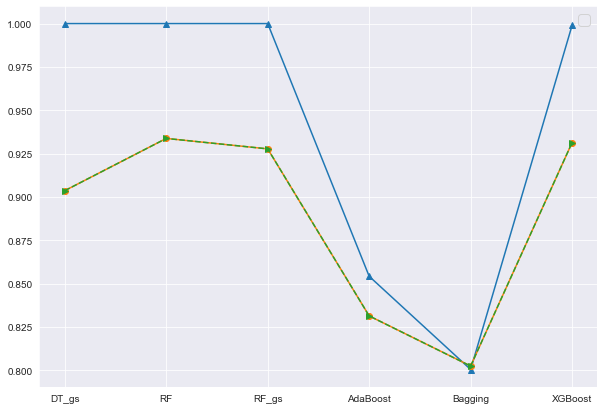

In [316]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
plt.plot(df_metrics['Model'], df_metrics['Train_Acc'], marker = '^')
plt.plot(df_metrics['Model'], df_metrics['Val_Acc'], marker = 'o')
plt.plot(df_metrics['Model'], df_metrics['F1_score'], marker = '>', linestyle='--')
plt.legend(fontsize = 15)
plt.show()

In [120]:
# the figure represents the scores of various algo after SMOTE, GS only used in RF and DT
# with RF, we can see that the gap between train and val score reduces (OF reduced)

In [121]:
# which model is the best ? - XgBoost, RF

In [122]:
# using KNN, Logisitic reg, SVM -- check

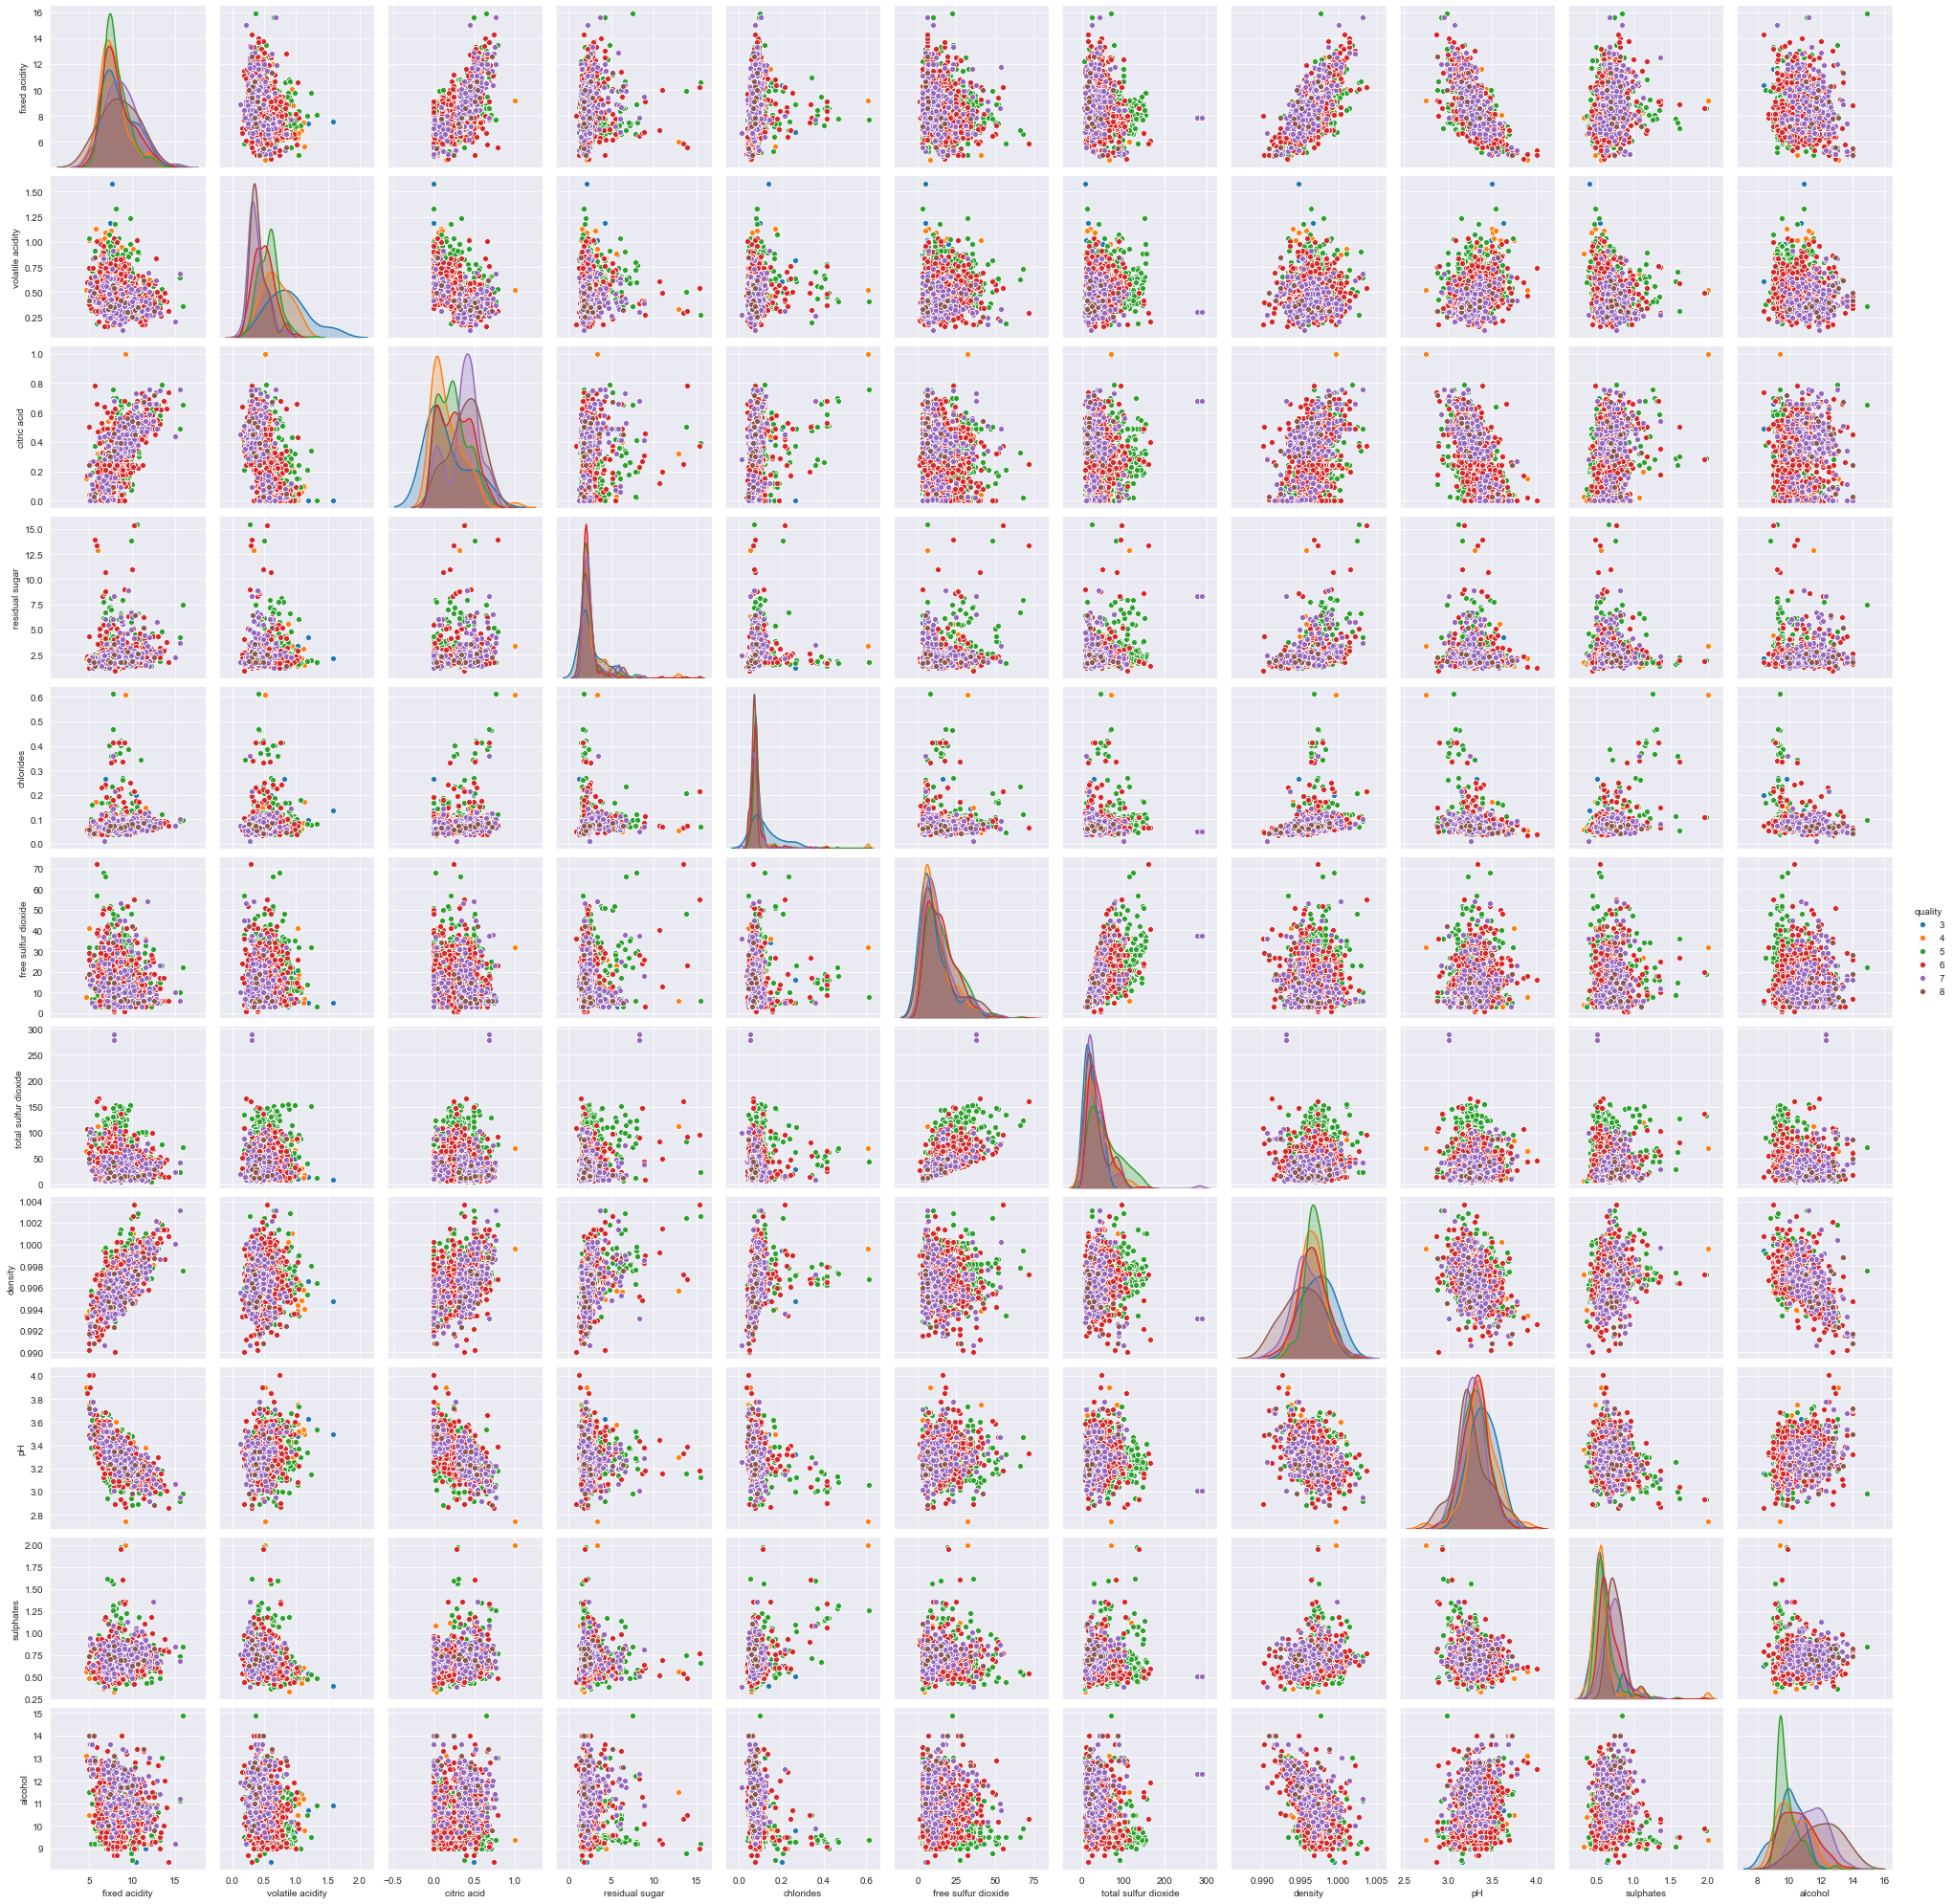

In [123]:
sns.pairplot(wine, hue = 'quality') # naive heck for overlapping 0-1 - Log R > SVM

In [124]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C= 0.9)
LR.fit(X_train_res, y_train_res)

LogisticRegression(C=0.9)

In [125]:
acc_LR = LR.score(X_train_res,y_train_res)
acc_val_LR = LR.score(X_val_res,y_val_res)
predictions_LR = LR.predict(X_val_res) 
f1_LR= f1_score(y_val_res,predictions_LR, average='micro')

In [126]:
from sklearn.svm import SVC
SV = SVC()
SV.fit(X_train_res, y_train_res)

SVC()

In [127]:
acc_SV = SV.score(X_train_res,y_train_res)
acc_val_SV = SV.score(X_val_res,y_val_res)
predictions_SV = SV.predict(X_val_res) 
f1_SV= f1_score(y_val_res,predictions_SV, average='micro')

In [128]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [129]:
acc_KN = KN.score(X_train_res,y_train_res)
acc_val_KN = KN.score(X_val_res,y_val_res)
predictions_KN = KN.predict(X_val_res) 
f1_KN= f1_score(y_val_res,predictions_KN, average='micro')

## Repeat previous process using binning/grouping to convert continuous to discrete !!

In [130]:
## BINING - preprocessing

In [131]:
wine = pd.read_csv(r'winequality-red.csv',sep=';')

In [176]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'fixed acidity_band',
       'volatile acidity_band', 'citric acid_band', 'residual sugar_band',
       'chlorides_band', 'free sulfur dioxide_band',
       'total sulfur dioxide_band', 'pH_band', 'density_band',
       'sulphates_band', 'alcohol_band'],
      dtype='object')

In [133]:
def clubLabelEncoder(df, feature, k):
    
    df[feature +'_band'] = pd.cut(df[feature], k)
    x = df[feature + '_band'].value_counts().index.tolist() # returning the list of intervals
    
    intervals = []
    for i in range(len(x)):
        leftInt = x[i].left
        rtInt = x[i].right
        intervals.append(leftInt)
        intervals.append(rtInt)
    
    intervals_ = sorted(list(set(intervals)))
    
    for i in range(len(intervals_)-1):
        
        df.loc[(df[feature] > intervals_[i]) & (df[feature] <= intervals_[i+1]), feature] = i
        
    #df = df.iloc[:,:-1]
    
    df = df.drop([feature +'_band'], axis = 1)
        
    return df[feature].value_counts()


In [ ]:
### ------ breaking the function

In [171]:
wine1 = pd.read_csv(r'winequality-red.csv',sep=';')

In [179]:
feature = 'fixed acidity'
df = wine1
k = 4

In [180]:
df[feature +'_band'] = pd.cut(df[feature], k)
x = df[feature + '_band'].value_counts().index.tolist()

In [188]:
x

[Interval(7.425, 10.25, closed='right'),
 Interval(4.589, 7.425, closed='right'),
 Interval(10.25, 13.075, closed='right'),
 Interval(13.075, 15.9, closed='right')]

In [183]:
type(x[0])

pandas._libs.interval.Interval

In [187]:
x[0].left, x[0].right

(7.425, 10.25)

In [189]:
    intervals = []
    for i in range(len(x)):
        leftInt = x[i].left
        rtInt = x[i].right
        intervals.append(leftInt)
        intervals.append(rtInt)

In [190]:
intervals

[7.425, 10.25, 4.589, 7.425, 10.25, 13.075, 13.075, 15.9]

In [191]:
intervals_ = sorted(list(set(intervals)))
intervals_

[4.589, 7.425, 10.25, 13.075, 15.9]

In [ ]:
    for i in range(len(intervals_)-1):
        
        df.loc[(df[feature] > intervals_[i]) & (df[feature] <= intervals_[i+1]), feature] = i

In [ ]:
### ------------------------------------------------------------------------

In [134]:
def categoryRename(df, colName, oldName, newName):
    
    df[colName][df[colName]==oldName]=newName

    return df

In [135]:
def createProportions(df,colName, dependentColName):
    
    tab = pd.crosstab(df[colName],  df[dependentColName],margins = False)
    prop = []
    for i in range(tab.shape[0]):
        value = tab.iloc[i,1]/tab.iloc[i,0]
        prop.append(value)
    tab['prop'] = prop

    return tab

In [136]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [138]:
# try this !!
pd.cut(wine['fixed acidity'], 4).value_counts()

(7.425, 10.25]     801
(4.589, 7.425]     574
(10.25, 13.075]    204
(13.075, 15.9]      20
Name: fixed acidity, dtype: int64

In [139]:
x1 = clubLabelEncoder(wine, 'fixed acidity', 4)
x1

1.0    801
0.0    574
2.0    204
3.0     20
Name: fixed acidity, dtype: int64

In [140]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity_band
0,0.0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"(4.589, 7.425]"
1,1.0,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"(7.425, 10.25]"
2,1.0,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"(7.425, 10.25]"
3,2.0,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,"(10.25, 13.075]"
4,0.0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"(4.589, 7.425]"


In [141]:
x2 = clubLabelEncoder(wine, 'volatile acidity', 4)
x3 = clubLabelEncoder(wine, 'citric acid', 4)
x4 = clubLabelEncoder(wine, 'residual sugar', 4)
x5 = clubLabelEncoder(wine, 'chlorides', 4)
x6 = clubLabelEncoder(wine, 'free sulfur dioxide', 4)
x7 = clubLabelEncoder(wine, 'total sulfur dioxide', 4)
x8 = clubLabelEncoder(wine, 'pH', 4)
x9 = clubLabelEncoder(wine, 'density', 4)
x10 = clubLabelEncoder(wine, 'sulphates', 4)
x11 = clubLabelEncoder(wine, 'alcohol', 4)

In [142]:
# try using a loop for the previous

In [143]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity_band,citric acid_band,residual sugar_band,chlorides_band,free sulfur dioxide_band,total sulfur dioxide_band,pH_band,density_band,sulphates_band,alcohol_band
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,"(0.485, 0.85]","(-0.001, 0.25]","(0.885, 4.55]","(0.0114, 0.162]","(0.929, 18.75]","(5.717, 76.75]","(3.375, 3.692]","(0.997, 1.0]","(0.328, 0.748]","(8.394, 10.025]"
1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,"(0.85, 1.215]","(-0.001, 0.25]","(0.885, 4.55]","(0.0114, 0.162]","(18.75, 36.5]","(5.717, 76.75]","(3.058, 3.375]","(0.993, 0.997]","(0.328, 0.748]","(8.394, 10.025]"
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,"(0.485, 0.85]","(-0.001, 0.25]","(0.885, 4.55]","(0.0114, 0.162]","(0.929, 18.75]","(5.717, 76.75]","(3.058, 3.375]","(0.997, 1.0]","(0.328, 0.748]","(8.394, 10.025]"
3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,"(0.119, 0.485]","(0.5, 0.75]","(0.885, 4.55]","(0.0114, 0.162]","(0.929, 18.75]","(5.717, 76.75]","(3.058, 3.375]","(0.997, 1.0]","(0.328, 0.748]","(8.394, 10.025]"
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,"(0.485, 0.85]","(-0.001, 0.25]","(0.885, 4.55]","(0.0114, 0.162]","(0.929, 18.75]","(5.717, 76.75]","(3.375, 3.692]","(0.997, 1.0]","(0.328, 0.748]","(8.394, 10.025]"


In [144]:
newcols = wine.columns.tolist()
print(newcols)
newcols.index('fixed acidity_band') # we don't need band columns

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'fixed acidity_band', 'volatile acidity_band', 'citric acid_band', 'residual sugar_band', 'chlorides_band', 'free sulfur dioxide_band', 'total sulfur dioxide_band', 'pH_band', 'density_band', 'sulphates_band', 'alcohol_band']


12

In [145]:
# so, selecting non band columns

In [146]:
df_new = wine[newcols[0:12]]

In [147]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,5
1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,5
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,5
3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,6
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,5


In [148]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8) # based on practical knowledge
group_names = ['bad', 'good']  
df_new['quality'] =  pd.cut(df_new['quality'], bins = bins, labels = group_names) # pd.cut(x, bins = (2, 6.5, 8), labels)

In [149]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
df_new['quality'] = label_quality.fit_transform(df_new['quality'])

In [150]:
df_new.head() # categorized independent features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0
1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0
3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0


In [152]:
X = df_new.drop('quality', axis = 1)
y = df_new['quality']

In [153]:
sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y)
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

In [154]:
best_param, acc_DT_gs, dt_gs = dtree_grid_search(X_train_res,y_train_res, 4) # after SMOTE
acc_DT_gs_new = dt_gs.score(X_train_res, y_train_res)
acc_val_DT_gs_new = dt_gs.score(X_val_res, y_val_res)
predictions_ = dt_gs.predict(X_val_res) 
f1_DT_gs_new = f1_score(y_val_res,predictions_, average='micro')

In [155]:
rfcl = RandomForestClassifier(n_estimators = 50) # no. of trees = 50
rfcl.fit(X_train_res, y_train_res)
acc_RF_new = rfcl.score(X_train_res,y_train_res)
acc_val_RF_new = rfcl.score(X_val_res,y_val_res)
predictions_RF = rfcl.predict(X_val_res) 
f1_RF_new = f1_score(y_val_res,predictions_RF, average='micro')

In [156]:
best_params, rf_gscv, score_gscv = RF_grid_search(X_train_res,y_train_res,4)
acc_RF_gs_new = score_gscv
acc_val_RF_gs_new = rf_gscv.score(X_val_res,y_val_res)
predictions_RF_gs = rf_gscv.predict(X_val_res) 
f1_RF_gs_new = f1_score(y_val_res,predictions_RF_gs, average='micro')

In [157]:
#print(classification_report(y_val_res, predictions_RF)) # so from (93,93) without categorizing, now (90, 89) after categrozing 

In [158]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl.fit(X_train, y_train)
acc_BG_new = bgcl.score(X_train_res,y_train_res)
acc_val_BG_new = bgcl.score(X_val_res,y_val_res)
predictions_BG = bgcl.predict(X_val_res) 
f1_BG_new = f1_score(y_val_res,predictions_BG, average='micro')

In [159]:
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl.fit(X_train_res, y_train_res)
acc_AB_new = abcl.score(X_train_res,y_train_res)
acc_val_AB_new = abcl.score(X_val_res,y_val_res)
predictions_AB = abcl.predict(X_val_res) 
f1_AB_new = f1_score(y_val_res,predictions_AB, average='micro')

In [160]:
xgboost = XGBClassifier(learning_rate =0.05, n_estimators=300, max_depth=5)
xgboost.fit(X_train_res, y_train_res)
acc_XGB_new = xgboost.score(X_train_res,y_train_res)
acc_val_XGB_new = xgboost.score(X_val_res,y_val_res)
predictions_XGB_new = xgboost.predict(X_val_res) 
f1_XGB_new = f1_score(y_val_res,predictions_XGB, average='micro')

[16:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [161]:
d_new = {'Model': ['DT_gs', 'RF', 'RF_gs', 'AdaBoost', 'Bagging', 'XGBoost'], 
     'Train_Acc':[acc_DT_gs, acc_RF, acc_RF_gs, acc_AB, acc_BG, acc_XGB], 
     'Train_Acc_new':[acc_DT_gs_new, acc_RF_new, acc_RF_gs_new, acc_AB_new, acc_BG_new, acc_XGB_new],
     'Val_Acc': [acc_val_DT_gs, acc_val_RF, acc_val_RF_gs, acc_val_AB, acc_val_BG, acc_val_XGB], 
     'Val_Acc_new': [acc_val_DT_gs_new, acc_val_RF_new, acc_val_RF_gs_new, acc_val_AB_new, acc_val_BG_new, acc_val_XGB_new], 
     'F1_score':[f1_DT_gs, f1_RF, f1_RF_gs, f1_AB, f1_BG, f1_XGB],
     'F1_score_new':[f1_DT_gs_new, f1_RF_new, f1_RF_gs_new, f1_AB_new, f1_BG_new, f1_XGB_new]}

df_metrics_new = pd.DataFrame(d_new)
df_metrics_new

,Model,Train_Acc,Train_Acc_new,Val_Acc,Val_Acc_new,F1_score,F1_score_new
0,DT_gs,0.929162,0.929162,0.912048,0.879518,0.912048,0.879518
1,RF,1.000000,0.929162,0.934940,0.897590,0.934940,0.897590
2,RF_gs,1.000000,0.929162,0.931325,0.900000,0.931325,0.900000
3,AdaBoost,0.854188,0.814891,0.831325,0.795181,0.831325,0.795181
4,Bagging,0.800414,0.701655,0.802410,0.697590,0.802410,0.697590
5,XGBoost,0.998966,0.914168,0.931325,0.900000,0.931325,0.931325


No handles with labels found to put in legend.


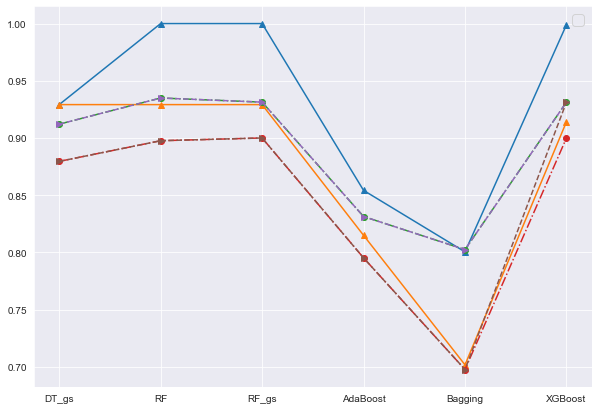

In [162]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
plt.plot(df_metrics_new['Model'], df_metrics_new['Train_Acc'], marker = '^')
plt.plot(df_metrics_new['Model'], df_metrics_new['Train_Acc_new'], marker = '^')

plt.plot(df_metrics_new['Model'], df_metrics_new['Val_Acc'], marker = 'o', linestyle='-.')
plt.plot(df_metrics_new['Model'], df_metrics_new['Val_Acc_new'], marker = 'o', linestyle='-.')

plt.plot(df_metrics_new['Model'], df_metrics_new['F1_score'], marker = '>', linestyle='--')
plt.plot(df_metrics_new['Model'], df_metrics_new['F1_score_new'], marker = '>', linestyle='--')
plt.legend(fontsize = 15)
plt.show()

In [163]:
# difficult to understand from this figure (ovelapping points) unlike the previous case

In [164]:
df_metrics_new

,Model,Train_Acc,Train_Acc_new,Val_Acc,Val_Acc_new,F1_score,F1_score_new
0,DT_gs,0.929162,0.929162,0.912048,0.879518,0.912048,0.879518
1,RF,1.000000,0.929162,0.934940,0.897590,0.934940,0.897590
2,RF_gs,1.000000,0.929162,0.931325,0.900000,0.931325,0.900000
3,AdaBoost,0.854188,0.814891,0.831325,0.795181,0.831325,0.795181
4,Bagging,0.800414,0.701655,0.802410,0.697590,0.802410,0.697590
5,XGBoost,0.998966,0.914168,0.931325,0.900000,0.931325,0.931325


In [165]:
df_metrics_new.set_index('Model', inplace = True) # don't save it in a variable, instead replace the indexes
df_metrics_new.head()

,Train_Acc,Train_Acc_new,Val_Acc,Val_Acc_new,F1_score,F1_score_new
Model,,,,,,
DT_gs,0.929162,0.929162,0.912048,0.879518,0.912048,0.879518
RF,1.000000,0.929162,0.934940,0.897590,0.934940,0.897590
RF_gs,1.000000,0.929162,0.931325,0.900000,0.931325,0.900000
AdaBoost,0.854188,0.814891,0.831325,0.795181,0.831325,0.795181
Bagging,0.800414,0.701655,0.802410,0.697590,0.802410,0.697590


#### Try group bar plot for better visualization

In [450]:
#https://python-graph-gallery.com/11-grouped-barplot/

#length method - so use Method column as index, that helps in seggreating the data Model wise - groups

In [ ]:
# pandas.plot

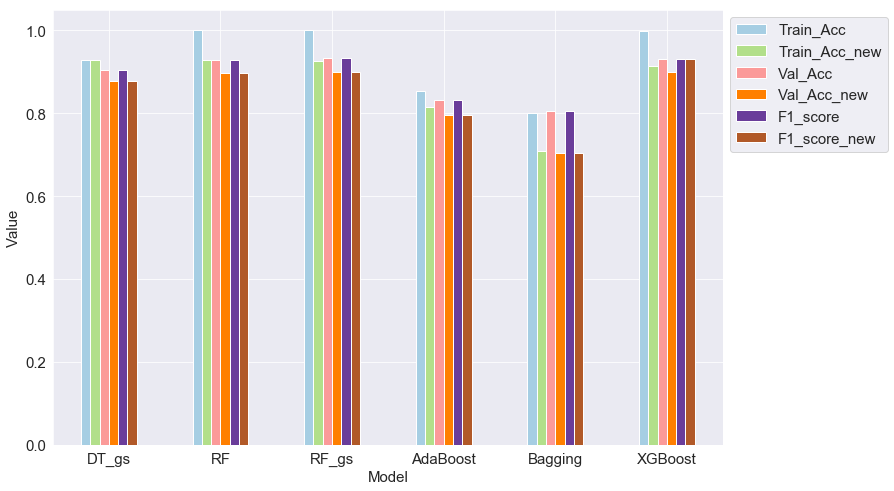

In [194]:
ax = df_metrics_new.plot(kind='bar', rot = 0, figsize = (12,8), fontsize = 15,colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel("Value", fontsize=18)
ax.set_xlabel("Model", fontsize=18)
plt.show()

### Observations:
1. With the old method, RF/Xgb is the best
2. With the new method, XGBoost is the best because XGboost F1_score_new > RF F1_score_new
3. New method is better (train-val score diff is less)- converting numerical to categorical indeed helps for RF and Xgboost but not much for other algos

In [ ]:
# 3 to 8 --- 0,1 --- 0,1,2 bad, medium, good

In [166]:
# adding other alogos

d_add = {'Model': ['DT_gs', 'RF', 'RF_gs', 'AdaBoost', 'Bagging', 'XGBoost', 'LR', 'SVM', 'KNN'], 
     'Train_Acc':[acc_DT_gs, acc_RF, acc_RF_gs, acc_AB, acc_BG, acc_XGB, acc_LR, acc_SV, acc_KN], 
     'Val_Acc': [acc_val_DT_gs, acc_val_RF, acc_val_RF_gs, acc_val_AB, acc_val_BG, acc_val_XGB, acc_val_LR, acc_val_SV, acc_val_KN], 
     'F1_score':[f1_DT_gs, f1_RF, f1_RF_gs, f1_AB, f1_BG, f1_XGB, f1_LR, f1_SV, f1_KN]}

df_metrics_add = pd.DataFrame(d_add)
df_metrics_add

,Model,Train_Acc,Val_Acc,F1_score
0,DT_gs,0.929162,0.912048,0.912048
1,RF,1.000000,0.934940,0.934940
2,RF_gs,1.000000,0.931325,0.931325
3,AdaBoost,0.854188,0.831325,0.831325
4,Bagging,0.800414,0.802410,0.802410
5,XGBoost,0.998966,0.931325,0.931325
6,LR,0.807135,0.809639,0.809639
7,SVM,0.726991,0.714458,0.714458
8,KNN,0.906412,0.863855,0.863855


In [167]:
df_metrics_add.set_index('Model', inplace = True) # don't save it in a variable, instead replace the indexes
df_metrics_add

,Train_Acc,Val_Acc,F1_score
Model,,,
DT_gs,0.929162,0.912048,0.912048
RF,1.000000,0.934940,0.934940
RF_gs,1.000000,0.931325,0.931325
AdaBoost,0.854188,0.831325,0.831325
Bagging,0.800414,0.802410,0.802410
XGBoost,0.998966,0.931325,0.931325
LR,0.807135,0.809639,0.809639
SVM,0.726991,0.714458,0.714458
KNN,0.906412,0.863855,0.863855


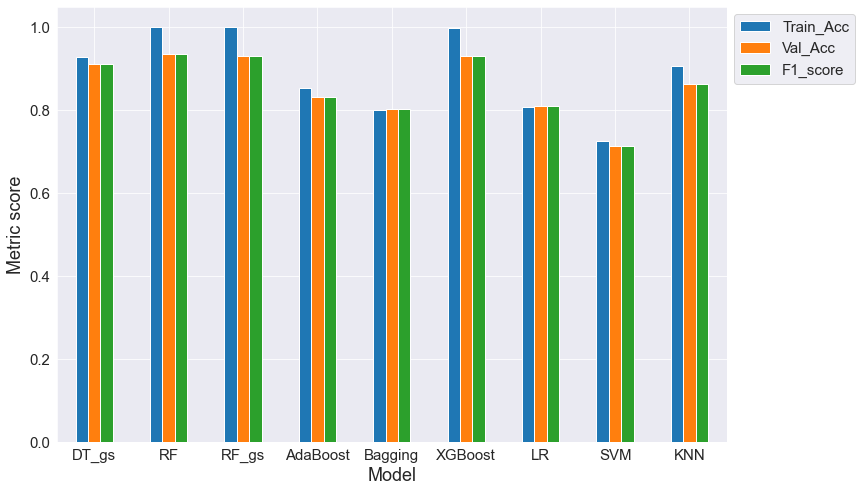

In [168]:
ax = df_metrics_add.plot(kind='bar', rot = 0, figsize = (12,8), fontsize = 15) #,colormap='Pastel1') 
#https://matplotlib.org/tutorials/colors/colormaps.html
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel("Metric score", fontsize=18)
ax.set_xlabel("Model", fontsize=18)
plt.show()

### Note: SVM also seems to be quite good wrt XGBoost but might not be as good as XGBoost_new

In [ ]:
## try voter classifier on XGB, RF, KNN,RF_Gs -- homework !!

## So, what about 3 classes with numerical features (not categorized)

In [195]:
df = pd.read_csv(r'winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [196]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [197]:
# 6 as it is
# 7, 8 together
# 3,4,5 together

In [198]:
# HW
# 3,4 - bad
# 5,6 - medium
# 7,8 - good

In [199]:
df['quality'][df['quality'] == 8] =7 # clubbing 7 and 8

In [200]:
df['quality'][df['quality'] == 4] =5 # clubbing 4 and 5

In [201]:
df['quality'][df['quality'] == 3] =5 # clubbing 3 and 5, not clubbing 6

In [202]:
df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [203]:
# making them more readable
df['quality'][df['quality'] == 5] =0 
df['quality'][df['quality'] == 6] =1 
df['quality'][df['quality'] == 7] =2 

In [204]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [205]:
## without SOMTE

In [206]:
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

In [207]:
best_param, acc_DT_gs, dt_gs = dtree_grid_search(X_train,y_train, 4) # after SMOTE
acc_val_DT_gs = dt_gs.score(X_val, y_val)

In [208]:
print(best_param)

{'criterion': 'gini', 'max_depth': 17}


In [209]:
print(acc_DT_gs, acc_val_DT_gs) 

0.9229576008273009 0.8795180722891566


In [210]:
predictions_ = dt_gs.predict(X_val_res) 
f1_DT_gs = f1_score(y_val_res,predictions_, average='micro')

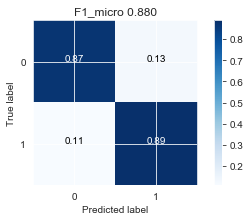

In [211]:
plt.figure(figsize=(5,3))
cnf_mat = confusion_matrix(y_val_res,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1_DT_gs))

In [212]:
print(classification_report(y_val_res, predictions_)) # without SMOTE

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       426
           1       0.87      0.89      0.88       404

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



In [213]:
sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y)
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

In [214]:
print(X.shape, X_sm.shape)

(1599, 11) (2232, 11)


In [215]:
print(sum(y==0), sum(y_sm ==0))

744 744


In [216]:
print(sum(y==1), sum(y_sm ==1))

638 744


In [217]:
print(sum(y==2), sum(y_sm ==2))

217 744


In [218]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [219]:
best_param, acc_DT_gs, dt_gs = dtree_grid_search(X_train_res,y_train_res, 4) # after SMOTE
acc_val_DT_gs = dt_gs.score(X_val_res, y_val_res)

In [220]:
print(best_param)

{'criterion': 'entropy', 'max_depth': 18}


In [221]:
print(acc_DT_gs, acc_val_DT_gs) 

1.0 0.735820895522388


In [222]:
predictions_ = dt_gs.predict(X_val_res) 
f1_DT_gs = f1_score(y_val_res,predictions_, average='micro')

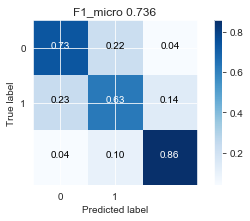

In [223]:
plt.figure(figsize=(5,3))
cnf_mat = confusion_matrix(y_val_res,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1_DT_gs))

In [224]:
print(classification_report(y_val_res, predictions_))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       226
           1       0.67      0.63      0.65       230
           2       0.81      0.86      0.83       214

    accuracy                           0.74       670
   macro avg       0.73      0.74      0.74       670
weighted avg       0.73      0.74      0.73       670



In [225]:
rfcl = RandomForestClassifier(n_estimators = 50) # no. of trees = 50 # try GSCV
rfcl.fit(X_train_res, y_train_res) 
acc_RF = rfcl.score(X_train_res,y_train_res)
acc_val_RF = rfcl.score(X_val_res,y_val_res)
predictions_RF = rfcl.predict(X_val_res) 
print(classification_report(y_val_res, predictions_RF))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       226
           1       0.71      0.67      0.68       230
           2       0.85      0.90      0.87       214

    accuracy                           0.78       670
   macro avg       0.78      0.78      0.78       670
weighted avg       0.77      0.78      0.78       670



In [226]:
xgboost = XGBClassifier(learning_rate =0.05, n_estimators=300, max_depth=5)
xgboost.fit(X_train_res, y_train_res)
acc_XGB = xgboost.score(X_train_res,y_train_res)
acc_val_XGB = xgboost.score(X_val_res,y_val_res)
predictions_XGB = xgboost.predict(X_val_res) 
print(classification_report(y_val_res, predictions_RF))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       226
           1       0.71      0.67      0.68       230
           2       0.85      0.90      0.87       214

    accuracy                           0.78       670
   macro avg       0.78      0.78      0.78       670
weighted avg       0.77      0.78      0.78       670



### So we can see that: when have three classes, score is lesser as compared to binary !! SMOTE doesn't seem to work perfectly especially with class 6 (solution - re-seggregate, ask for more data of the minority samples

In [ ]:
# try GSCV for each algo with and without binning 

## Let us try using all the labels 

In [227]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [228]:
X = wine_df.drop(['quality'], axis = 1)
y = wine_df['quality']

In [229]:
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [230]:
rfcl = RandomForestClassifier(n_estimators = 50) # no. of trees = 50
rfcl.fit(X_train_res, y_train_res) 
acc_RF = rfcl.score(X_train_res,y_train_res)
acc_val_RF = rfcl.score(X_val_res,y_val_res)
predictions_RF = rfcl.predict(X_val_res) 
print(classification_report(y_val_res, predictions_RF))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.72      0.78      0.75       208
           6       0.68      0.66      0.67       204
           7       0.50      0.64      0.56        45
           8       0.00      0.00      0.00         5

    accuracy                           0.68       480
   macro avg       0.32      0.35      0.33       480
weighted avg       0.65      0.68      0.66       480



## Using all labels definitely does not help us - very low scores

In [ ]:
# use class_weight instead of SMOTE !!!

In [ ]:
class_weight = {0: 0.25, 1:0.75} # for binary class
# https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work

In [ ]:
# RandomForestClassifier(class_weight = class_weight)